## CubeWidget

The CubeWidget provides a visual interface to a Fits datacube using ginga/astrowidgets/ipywidgets. It is developed to function on any FITS cube in which the 1st data axis represents the spectral dim provided the WCS is included. Click on any spatial region to see the spectrum at that pixel. Use the play button to scan through wavelength space or the slider to get a specfic wavelength.

In [1]:
from astropy import units as u

from hetdex_tools.interpolate import make_data_cube
from hetdex_api.cube_widget import CubeWidget

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

### Make Your own data cube from a Detectid or SkyCoord object

In [4]:
hdu = make_data_cube(detectid=3012548867, imsize=30.*u.arcsec, survey='hdr3')
#hdu = make_data_cube(detectid=2100000335, subcont=False, dwave=10, imsize=40.*u.arcsec, pixscale=0.5*u.arcsec, survey='hdr2.1')

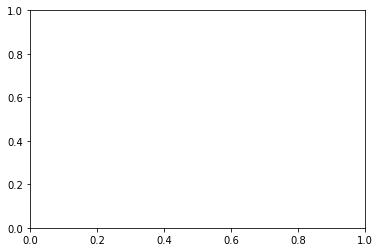

In [5]:
w = CubeWidget(hdu=hdu)

To save the datacube:

In [6]:
hdu.writeto('data_cube.fits')

OSError: File 'data_cube.fits' already exists.

## For Data Cube Options:

In [7]:
help(make_data_cube)

Help on function make_data_cube in module hetdex_tools.interpolate:

make_data_cube(detectid=None, coords=None, shotid=None, pixscale=<Quantity 0.25 arcsec>, imsize=<Quantity 30. arcsec>, wave_range=[3470, 5540], dwave=2.0, dcont=50.0, convolve_image=True, ffsky=True, subcont=False, survey='hdr3')
    Function to make a datacube from either a detectid or from a
    coordinate/shotid combination.
    
    Paramaters
    ----------
    detectid: int
        detectid from the continuum or lines catalog. Default is
        None. Provide a coords/shotid combo if this isn't given
    coords: SkyCoords object
        coordinates to define the centre of the data cube
    pixscale: astropy angle quantity
        plate scale
    imsize: astropy angle quantity
        spatial length of cube (equal dims is only option)
    wave_range: list
        start and stop value for the wavelength range in Angstrom
    dwave
        step in wavelength range in Angstrom
    convolve_image: bool
         optio

# How to find a shotid for any coords:

In [8]:
import numpy as np
from hetdex_api.survey import FiberIndex
from astropy.coordinates import SkyCoord

In [9]:
FibIndex = FiberIndex()

In [10]:
star_coords = SkyCoord(176.32574, 51.514133, unit='deg')

In [11]:
fiber_table_region = FibIndex.query_region(star_coords, radius=3.*u.arcsec, shotid=None)

In [19]:
print("Fibers within 3 arcsec of {} are in:\n {}".format(star_coords, np.unique(fiber_table_region['shotid'])))

Fibers within 3 arcsec of <SkyCoord (ICRS): (ra, dec) in deg
    (176.32574, 51.514133)> are in:
    shotid  
-----------
20190208022


In [20]:
hdu_star = make_data_cube(coords=star_coords, shotid=20190208022) 

In [ ]:
w = CubeWidget(hdu=hdu_star)